# TUTORIAL: wandb.ai - Weights & Biases integration in notebooks

The purpose of this tutorial is to show how it is possible to use Weights & Biases with **AI Notebooks**.

### **USE CASE:** Image Classification with MNIST dataset

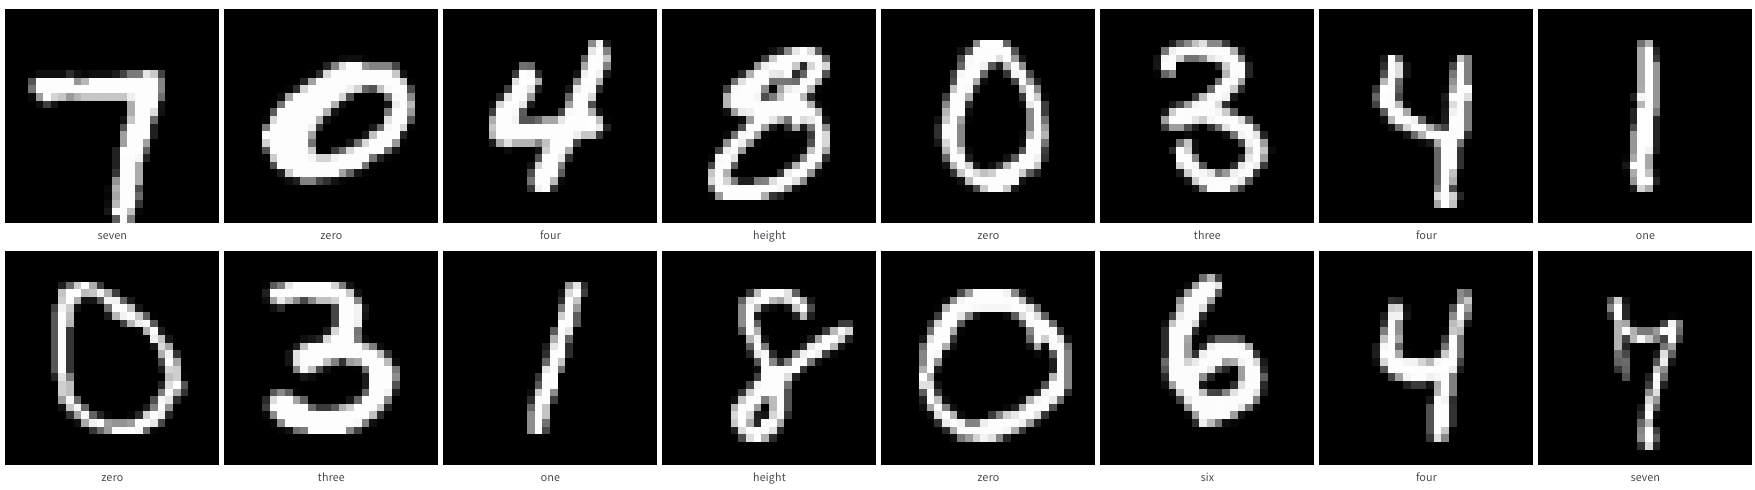

## Introduction

**What is Weights & Biases?**

" *Weights & Biases helps you build better models faster with a central dashboard for machine learning projects. Use our tools to log hyperparameters and output metrics from your runs, then visualize and compare results and quickly share findings with your colleagues.* "

## Requirements

First, create a Weights & Biases account: https://wandb.ai/site.

Secondly, to use Weights & Biases on **AI Notebooks**, create a new notebook and you will be able to train your model on your dataset.

Thanks to wandb.ai you will be able to display your metrics as you train your model.

## Code

The different steps are as follow:

- Install wandb and login
- Install other depencies as necessary
- Download and prepare your dataset
- Define your model
- Launch your training
- Display the metrics after training and calculate the test error rate
- Overview of dynamic display with Weights & Biases
- Use of computing resources

### Install wandb and login

In [ ]:
# install Weights and Biases
!pip install wandb

⚠️ Remember to restart the kernel after installation.

In [1]:
# import the required dependencies 
import wandb
from wandb.keras import WandbCallback

In [ ]:
# authorize Weights and Biases
wandb.login()

### Install other dependencies as necessary

In [ ]:
# install dependencies
!pip install matplotlib pandas

In [3]:
# import dependencies
import os
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

### Download and prepare your dataset

In [4]:
# load your dataset and split it (here the MNIST dataset)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# scale images to the [0, 1] range
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

# images must have shape (28,28,1)
X_train = X_train.reshape(-1 ,28 ,28 ,1)
X_test = X_test.reshape(-1 ,28 ,28 ,1)

# display test and train data size
print("X_train shape: ", X_train.shape) # number of train images, size
print("X_test shape: ", X_test.shape)   # number of test images, size
print("y_train shape: ", y_train.shape) # number of train labels (= number of train images)
print("y_test shape: ", y_test.shape)   # number of test labels (= number of test images)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)
y_train shape:  (60000,)
y_test shape:  (10000,)


In [5]:
# define the labels of the dataset (for the MNIST dataset, 10 labels)
classes_names = ["zero", "one", "two", "three","four", "five", "six", "seven", "height", "nine"]

### Define your model

In [6]:
# parameters
num_classes = len(classes_names)
input_shape = (28,28,1)

# build the model
def Model():
    inputs = keras.layers.Input(input_shape)
    
    x = keras.layers.Conv2D(28, kernel_size=(3, 3), activation='relu')(inputs)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(128, activation='relu')(x)  
   
    outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

    return keras.models.Model(inputs=inputs, outputs=outputs)

Your runs will be stored in the "wandb" folder.

In [7]:
# initialize wandb with your project name (here "notebook_tf_MNIST") and include hyperparameters and metadata
run = wandb.init(project = 'notebook_tf_MNIST',
                 config = {  
                     "learning_rate": 0.001,
                     "epochs": 10,
                     "batch_size": 64,
                     "dropout": 0.2,
                     "loss_function": "sparse_categorical_crossentropy",
                     "architecture": "CNN",
                     "dataset": "MNIST"
                 })

# use this to configure our experiment
config = run.config

# initialize model
tf.keras.backend.clear_session()
model = Model()
model.summary()

# compile model
optimizer = tf.keras.optimizers.Adam(config.learning_rate) 
model.compile(optimizer, config.loss_function, metrics = ['acc'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                             

### Launch your training

Observe your training over 10 epochs.

> Some warnings can appear, don't be afraid, you can execute the next steps of the notebook.

In [9]:
# take a subset of images (you don't need to display all of them)
val_images, val_labels = X_test[:32], y_test[:32]

# launch the training
_ = model.fit(X_train, y_train,
              epochs = config.epochs, 
              batch_size = config.batch_size,
              validation_data = (X_test, y_test),
              callbacks = [WandbCallback(data_type = 'image', 
                                       training_data = (val_images, val_labels), 
                                       labels = classes_names)])

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0071 - acc: 0.9976 - val_loss: 0.0566 - val_acc: 0.9858 - _timestamp: 1655904060.0000 - _runtime: 212.0000
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0039 - acc: 0.9987 - val_loss: 0.0496 - val_acc: 0.9859 - _timestamp: 1655904066.0000 - _runtime: 218.0000
Epoch 3/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0034 - acc: 0.9988 - val_loss: 0.0515 - val_acc: 0.9868 - _timestamp: 1655904072.0000 - _runtime: 224.0000
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0027 - acc: 0.9993 - val_loss: 0.0542 - val_acc: 0.9865 - _timestamp: 1655904077.0000 - _runtime: 229.0000
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0027 - acc: 0.9992 - val_loss: 0.0590 - val_acc: 0.9859 - _timestamp: 1655904083.0000 - _runtime: 235.0000
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0046 - ac

### Display the metrics after training and calculate the test error rate

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test error rate: ', round((1 - accuracy) * 100, 2))

# with wandb.log you can pass in metrics as key-value pairs
run.log({'Test error rate': round((1 - accuracy) * 100, 2)})

run.finish()

313/313 [==============================] - 1s 4ms/step - loss: 0.0651 - acc: 0.9876
Test error rate:  1.24


Test error rate,▁
acc,▁▆▆▇▇▇██████████████
epoch,▁▂▃▃▄▅▆▆▇█▁▂▃▃▄▅▆▆▇█
loss,█▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▃▄▅▆▆▆▇▇▅▆▆▇▆▆▅▆▆█▇
val_loss,█▄▃▁▁▁▂▁▂▆▅▃▄▄▆▇█▇▄▇
Test error rate,1.24
acc,0.999
best_epoch,4
best_val_loss,0.04216
epoch,9


### Overview of dynamic display with Weights & Biases

You can display several metrics such as loss or accuracy. It is also possible to compare trainings with the test error rate.

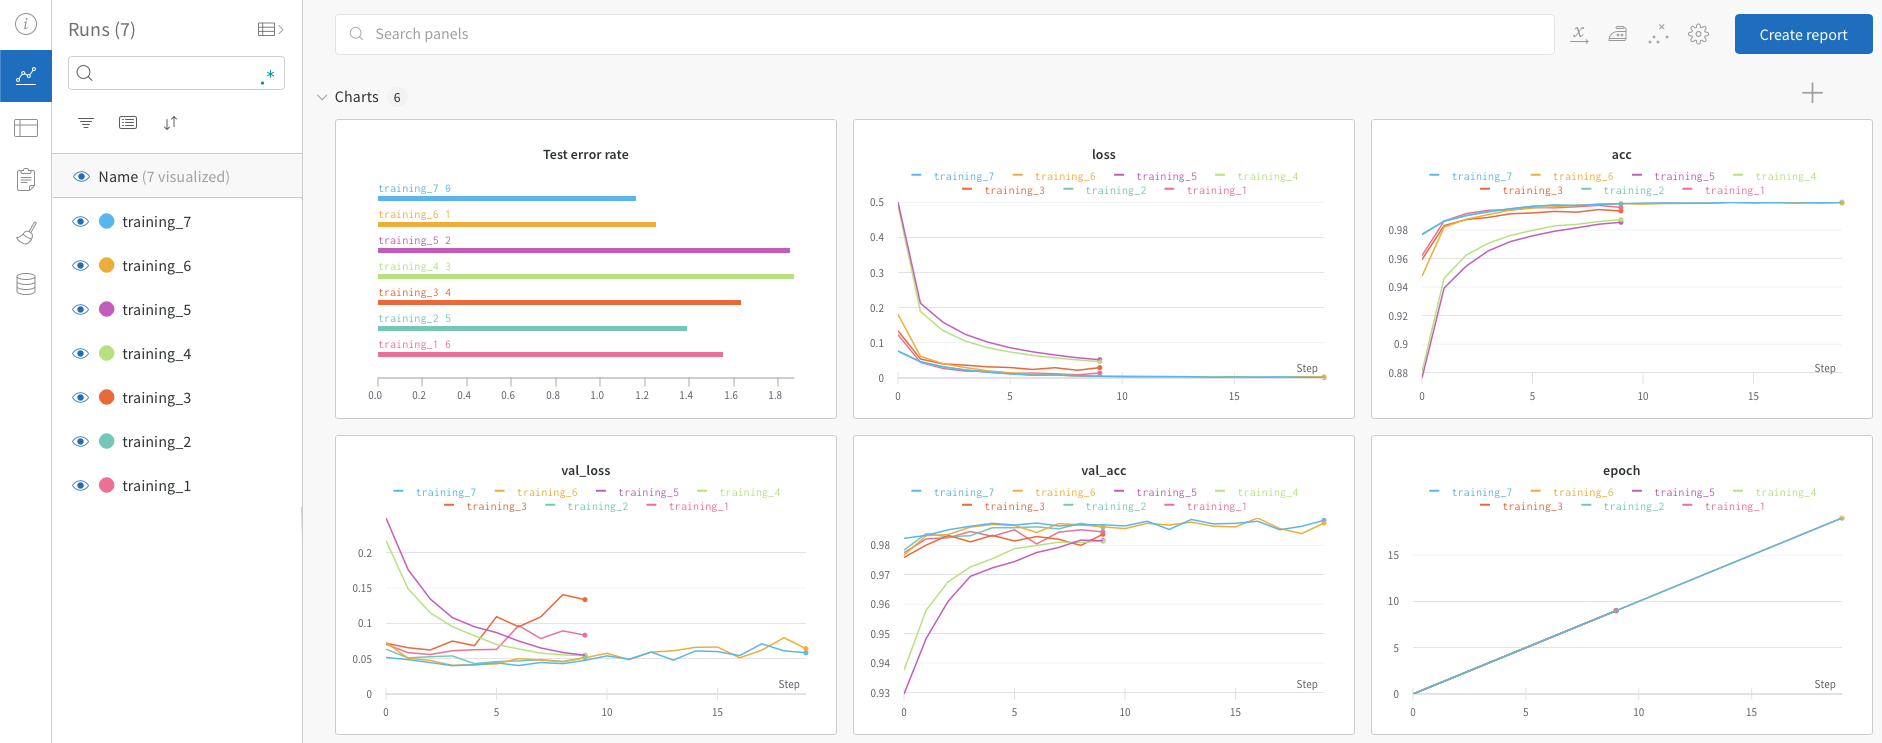


Another way to compare your trainings is to create an "*Parallel coordinates*" graph on Weights & Biases. You will be able to evaluate the performance of your trainings according to the hyperparameters.

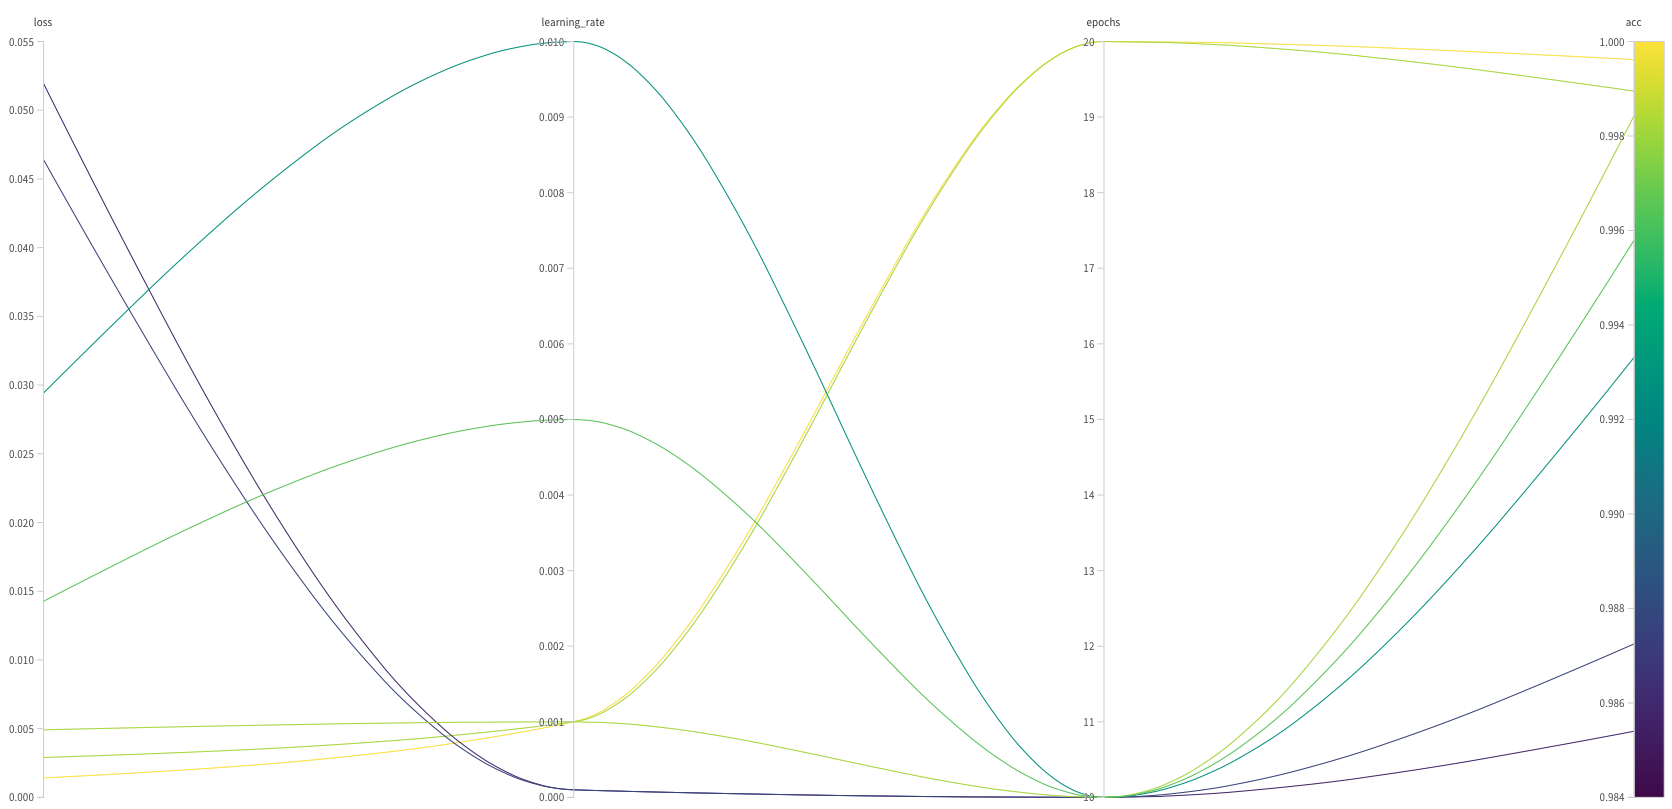

The best training (lowest loss and highest accuracy) is n°7:

- epochs: 20
- learning rate: 0.001
- dropout: 0.2
- loss: 0.0014
- accuracy: 0.9996

You can also see some images from the training:

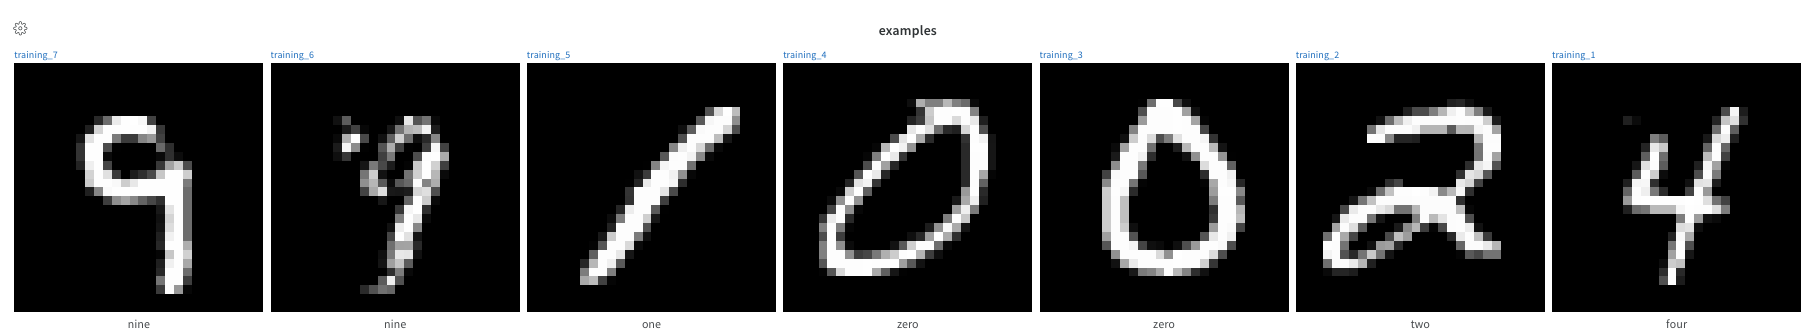

### Use of computing resources

Weights and Biases allows you to study how models actually use their computational resources. You can therefore see in a simple way how your computational resources are used.

Overview:


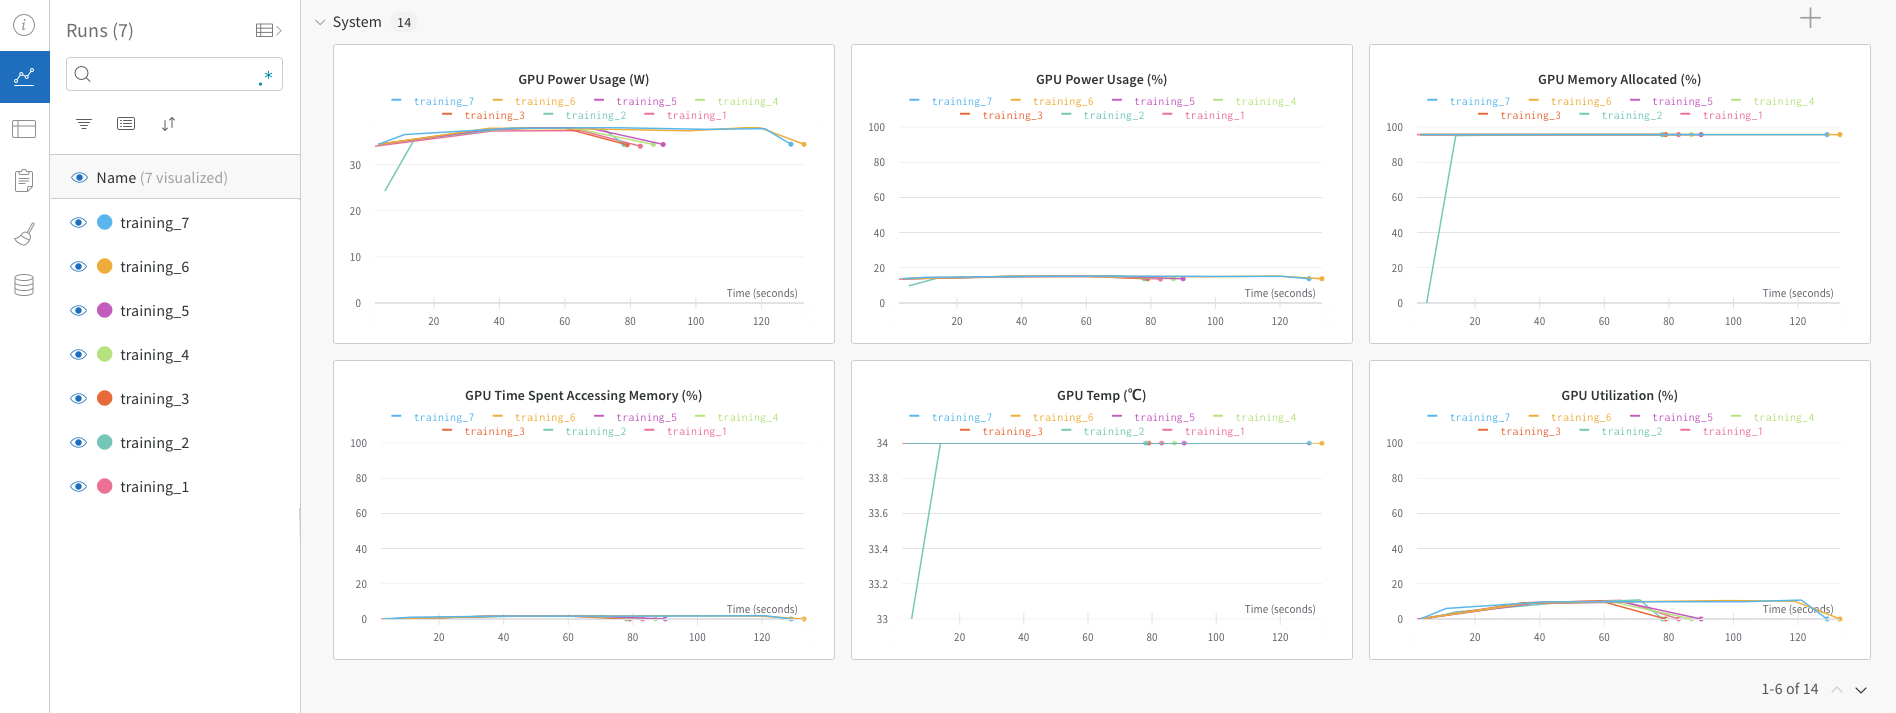

### Save and export the model for future inference

> To save your model, you should create an other Object Storage container (with write rights) and mount it in your workspace (saved_model in this example).

You can now save your model in a dedicated folder.

In [15]:
model.save('/workspace/saved_model/sketch_recognition_numbers_model.h5')